In [1]:
import sys
import os
sys.path.append('..')
os.chdir('c:/users/manuel/dev/sc2-ai-coach')
from os.path import isfile, join
from typing import Dict, List, Tuple, Callable
from external.fast_ssim.ssim import ssim
from PIL import Image
import numpy as np
from io import BytesIO
import httpx

In [2]:
kat_diamond = Image.open('tests/testdata/portraits/kat_diamond.png')
kat_unranked = Image.open('tests/testdata/portraits/katchinsky_portrait.png')


In [12]:
bnet_kat = "tests/testdata/portraits/kat_from_bnet.jpg"
bnet_kat = "https://static.starcraft2.com/starport/bda9a860-ca36-11ec-b5ea-4bed4e205979/portraits/0-0.jpg"

r = httpx.get(bnet_kat)

bnet_kat = BytesIO(r.content)

bnet_portrait = Image.open(bnet_kat).resize(
    (95,95), Image.Resampling.BICUBIC
)
diamond_frame = Image.open("assets/diamond_frame.png")

new = Image.new("RGB", (105, 105), (0, 0, 0))

new.paste(
    bnet_portrait,(5, 6),
)
new.paste(diamond_frame, (0, 0), diamond_frame)



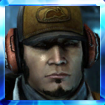

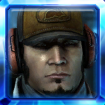

0.8401058316230774

In [13]:
display(new, kat_diamond)
ssim(np.array(new), np.array(kat_diamond))


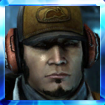

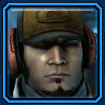

0.7813631296157837

In [14]:
display(new, kat_unranked)
ssim(np.array(new), np.array(kat_unranked))

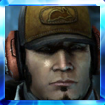

In [88]:
mem = BytesIO()
new.save(mem, format='png')

Image.open(mem)

In [68]:
screen_dir = '../obs/screenshots/'
filename = 'radhuset station le - BARCODE vs zatic 2024-03-23 15-15-41.png'

filepath = join(screen_dir, filename)

cvflags = cv2.IMREAD_GRAYSCALE
cvflags = None

NameError: name 'cv2' is not defined

In [257]:
def show(roi):
    cv2.imshow('roi', roi)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [258]:
# player left

def get_left_roi(image):
    x, y, w, h = 221, 560, 105, 105
    return image[y : y + h, x : x + w]



In [259]:
# player right


def get_right_roi(image):
    x, y, w, h = 2235, 560, 105, 105
    return image[y : y + h, x : x + w]


In [260]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])

	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

def ssim(imageA, imageB):
	return ssim_sewar(imageA, imageB)[0]

In [261]:
reference = cv2.imread(join(screen_dir, filename), flags=cvflags)
left = get_left_roi(reference)
right = get_right_roi(reference)
#show(left)
zatic = left

In [262]:
kats = {
    "kat1" : 'solaris le - Zatic vs BARCODE 2024-01-14 20-32-50.png',
    "kat2" : 'site delta le - BARCODE vs zatic 2024-03-03 16-46-46.png',
    "kat_master" : 'radhuset station le - BARCODE vs zatic 2024-01-09 17-03-09.png',
    "kat_unranked" : 'oceanborn le - Zatic vs BARCODE 2024-03-23 13-54-11.png'
}

kat1_barcode = get_right_roi(cv2.imread(join(screen_dir, kats["kat1"]), flags=cvflags) )
zatic_barcode = get_left_roi(cv2.imread(join(screen_dir, kats["kat1"]), flags=cvflags) )

display(mse(zatic, kat1_barcode))
display(ssim(zatic, kat1_barcode))
#display(ssim_skimage(zatic, kat1_barcode))
display(ssim_sewar(zatic, kat1_barcode))
display(ssim_external(zatic, kat1_barcode))
display(ssim_external(zatic, zatic_barcode))

imgs: Dict[str, Tuple] = {}

for kat, filename in kats.items() :
    img = cv2.imread(join(screen_dir, filename), flags=cvflags)
    imgs[kat] = (get_left_roi(img), get_right_roi(img))



21150.64752834467

0.24020705849604498

(0.24020705849604498, 0.2552791121441554)

0.28847643733024597

0.28663623332977295

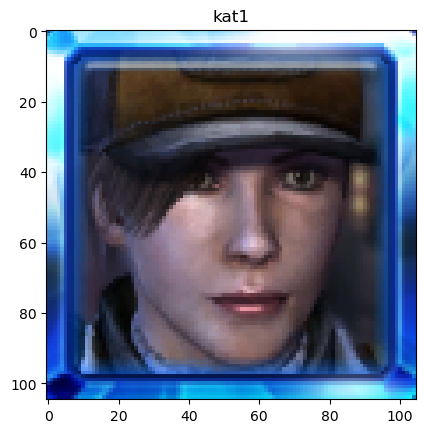

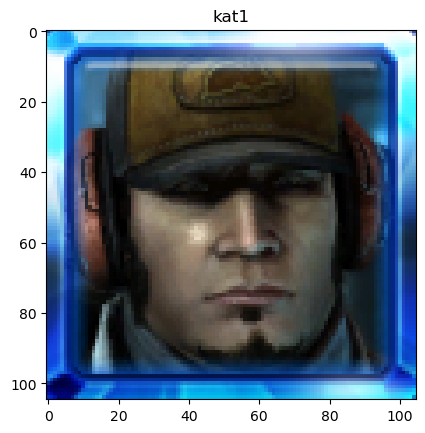

0.41806498169898987

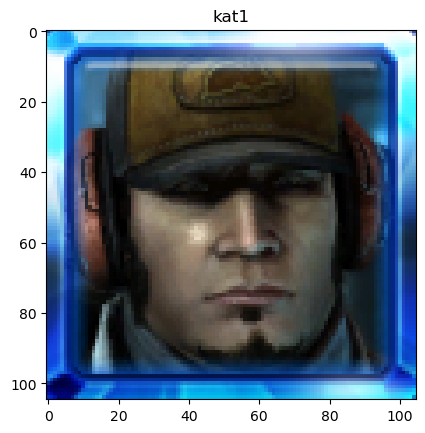

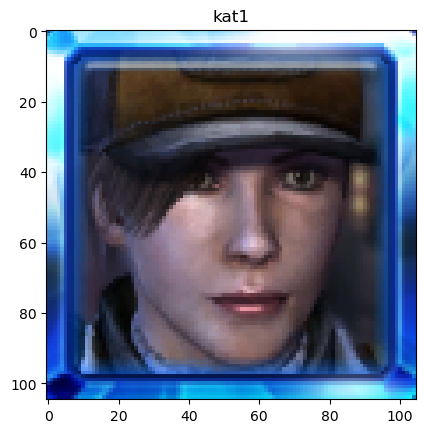

0.41806498169898987

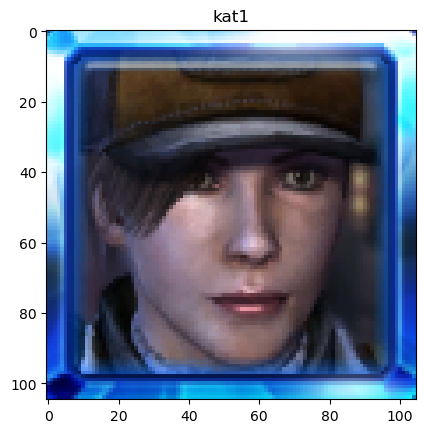

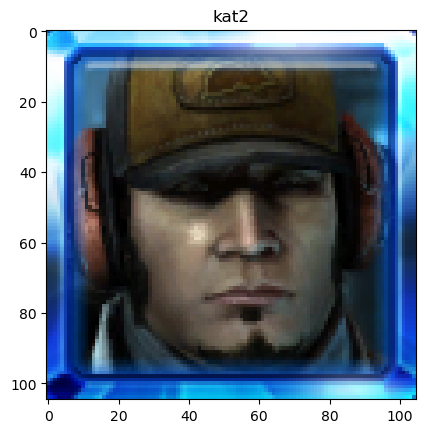

0.418549120426178

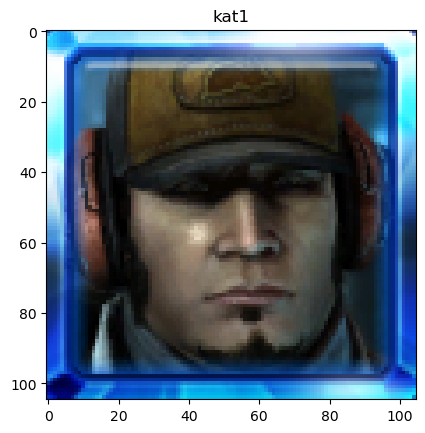

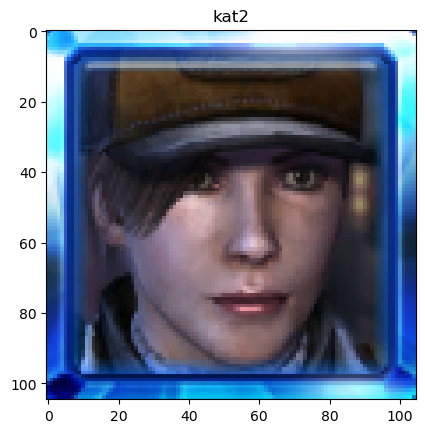

0.41864487528800964

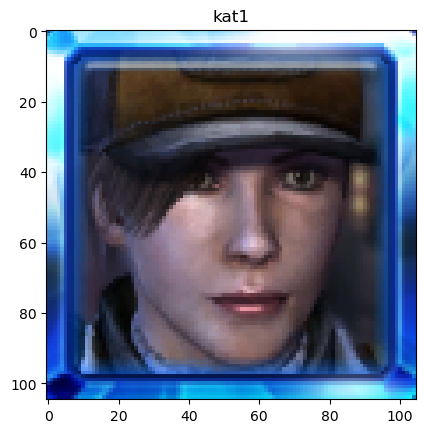

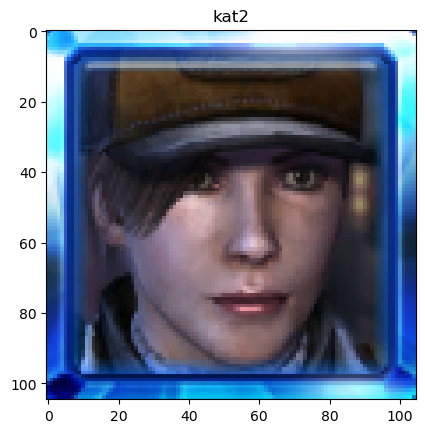

0.9981204271316528

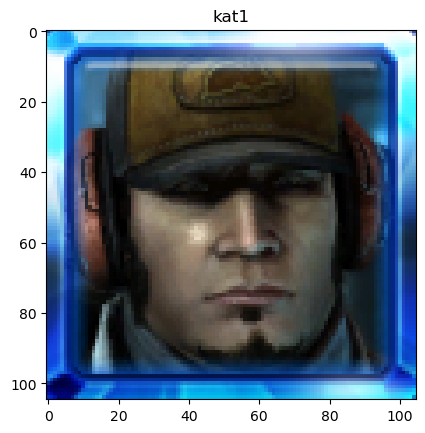

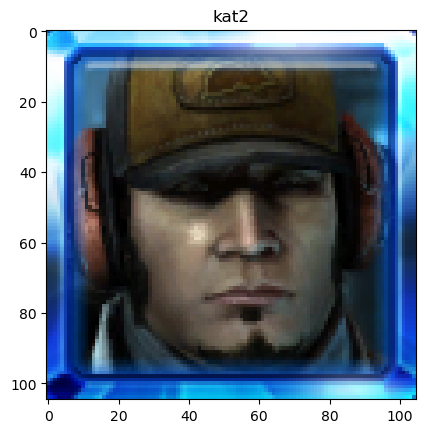

0.9979430437088013

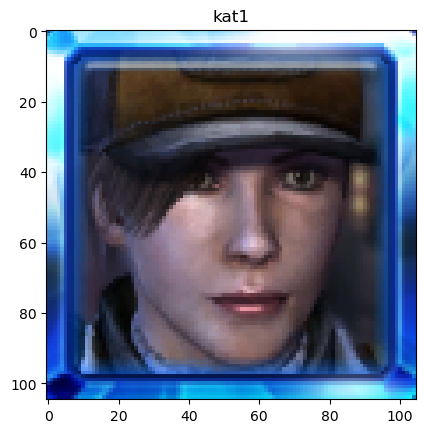

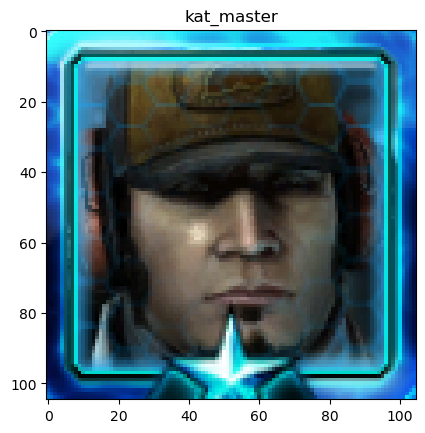

0.25978270173072815

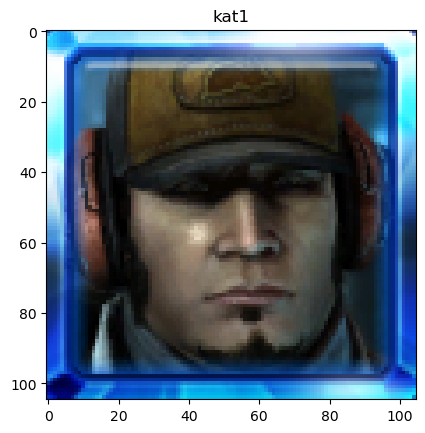

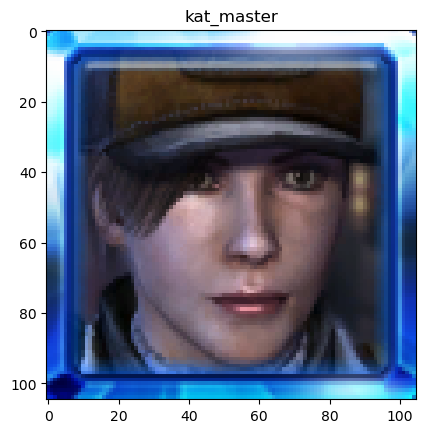

0.4188699722290039

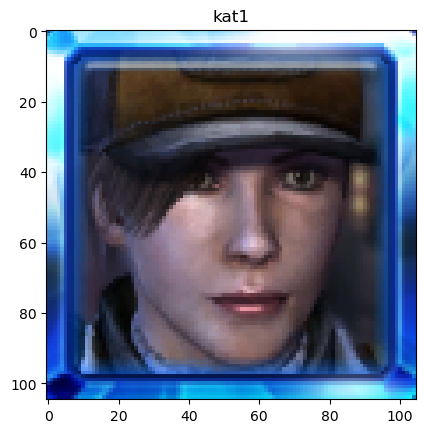

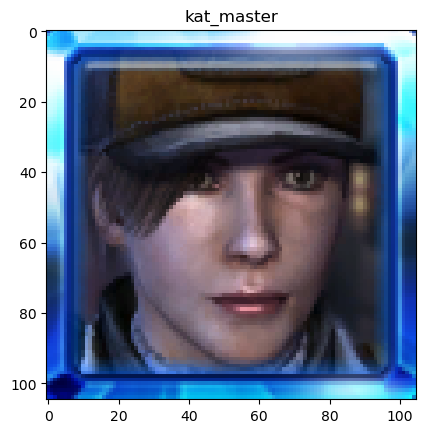

0.9984263181686401

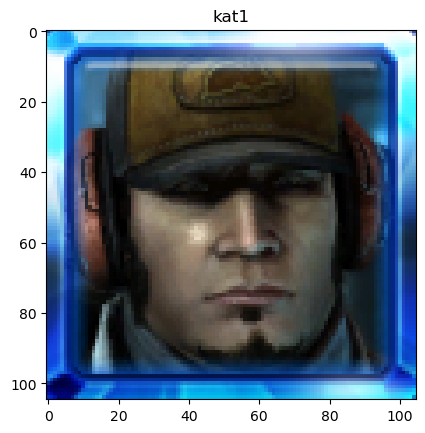

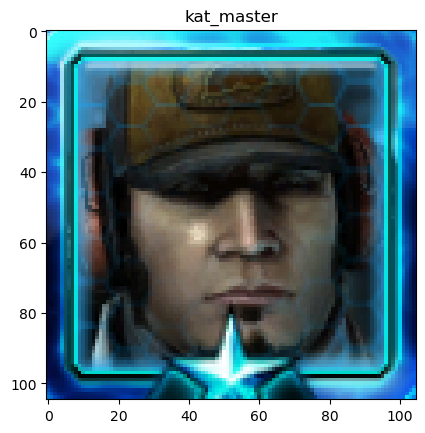

0.7304013967514038

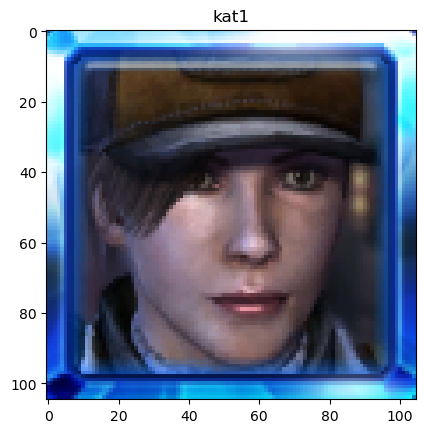

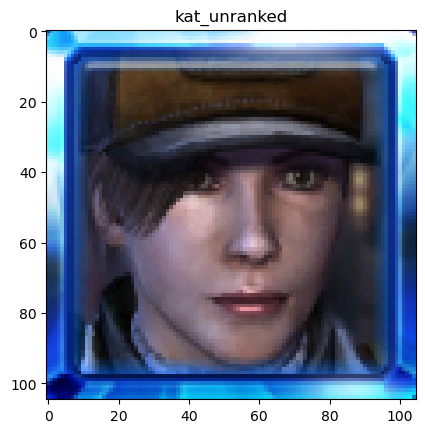

0.9997924566268921

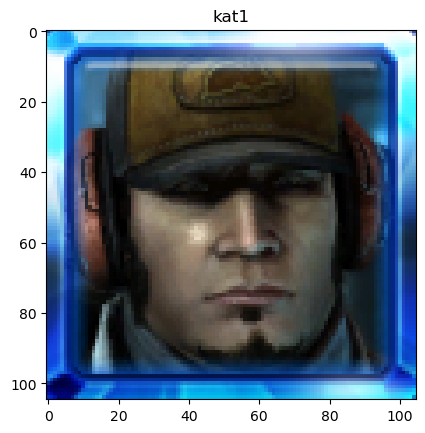

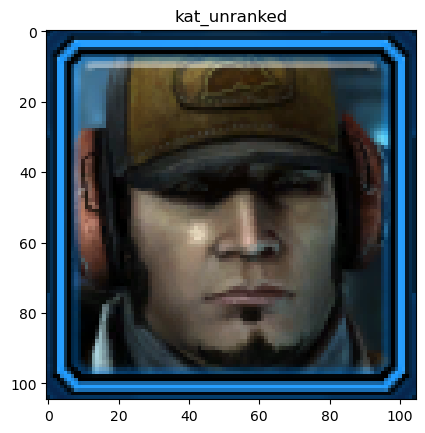

0.8554396033287048

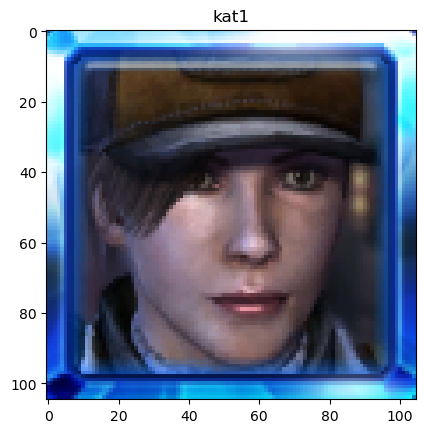

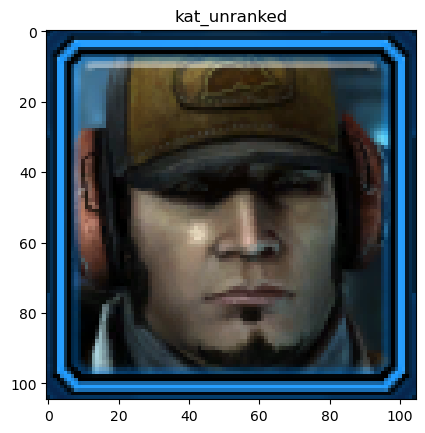

0.2850280702114105

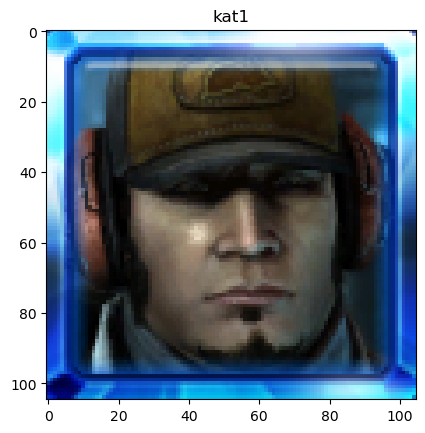

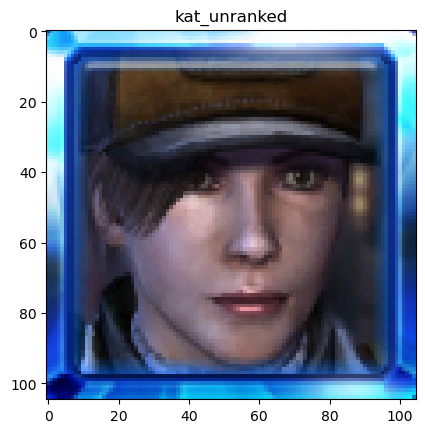

0.41799232363700867

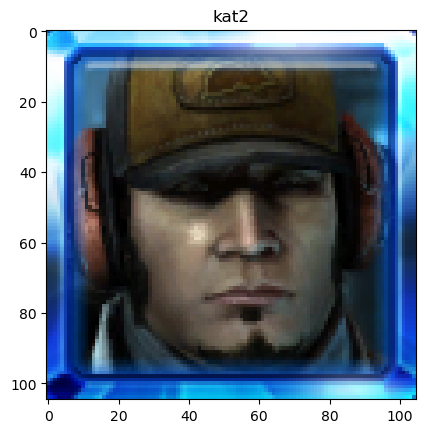

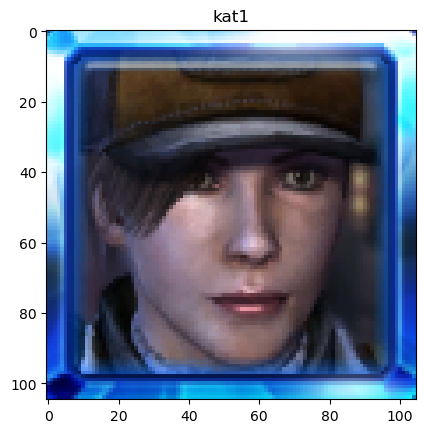

0.418549120426178

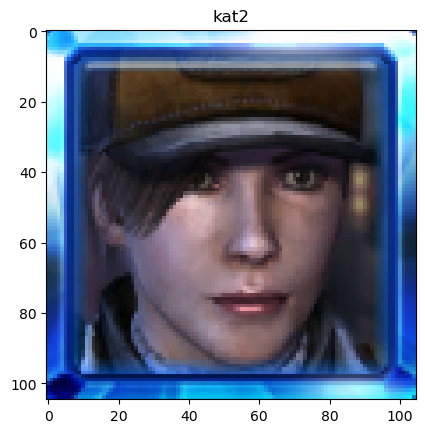

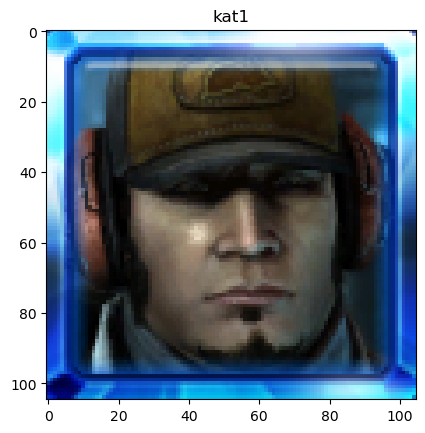

0.41864487528800964

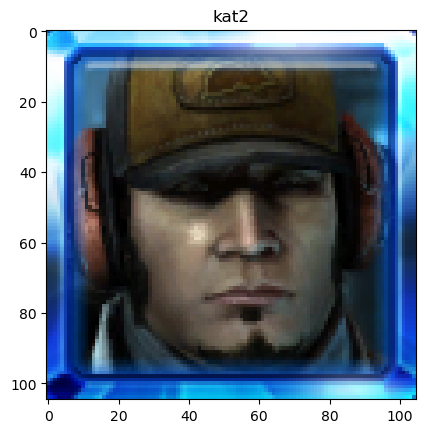

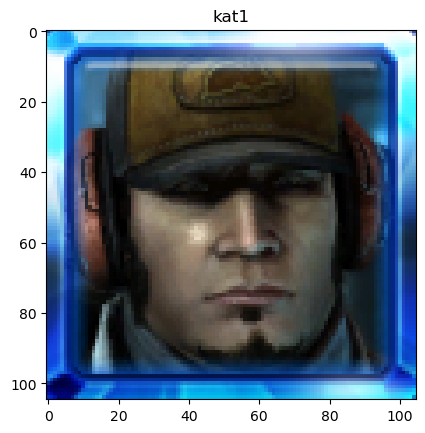

0.9979430437088013

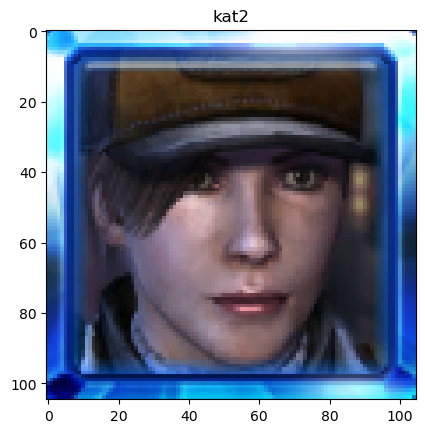

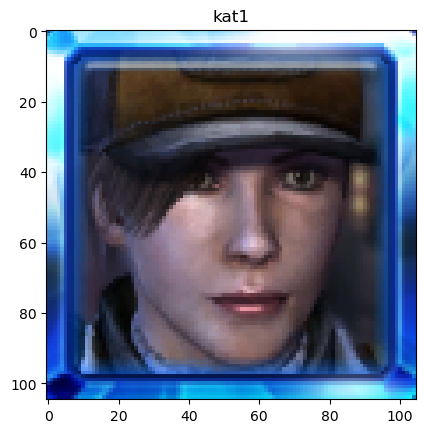

0.9981204271316528

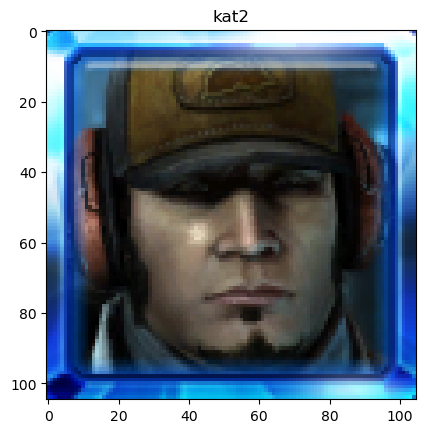

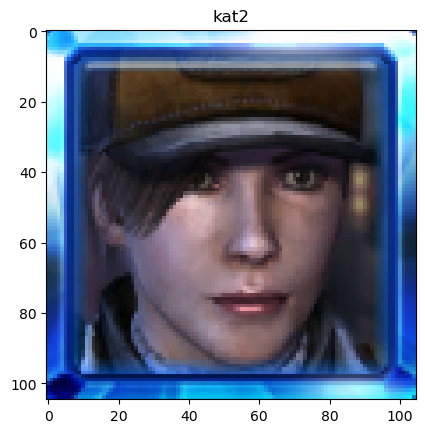

0.41746628284454346

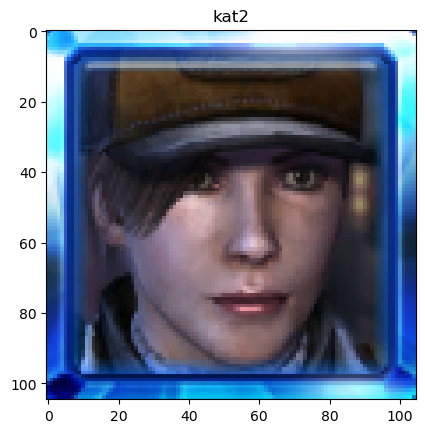

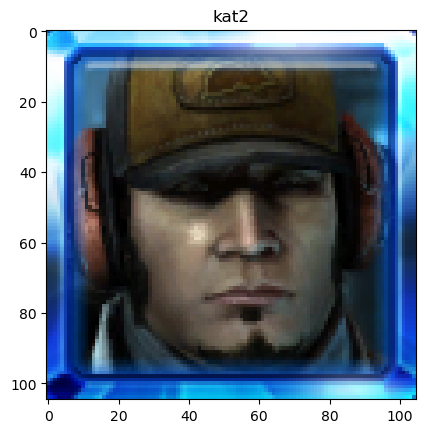

0.41746628284454346

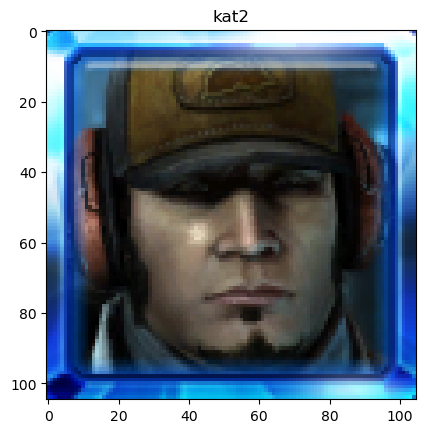

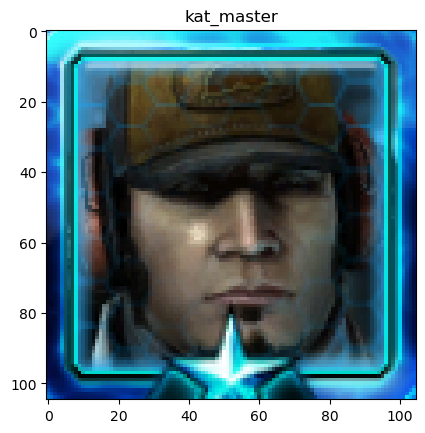

0.7320858836174011

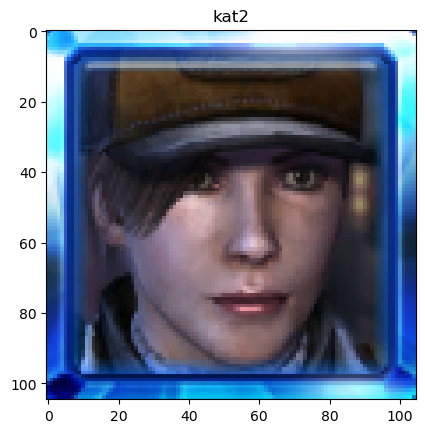

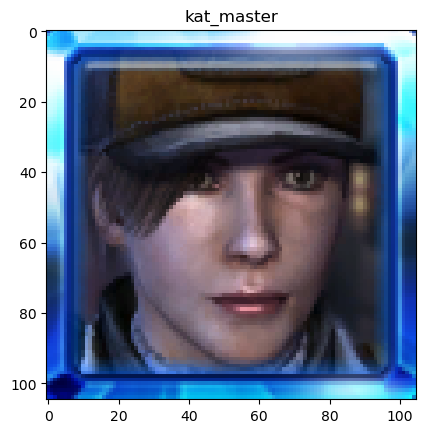

0.9999366998672485

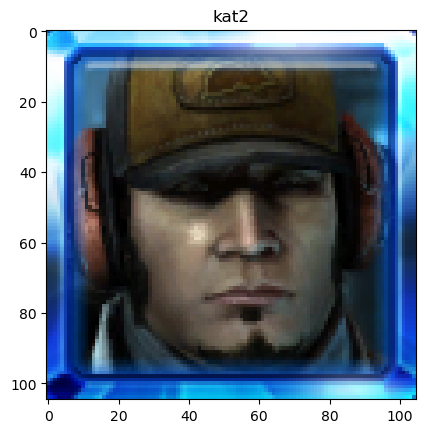

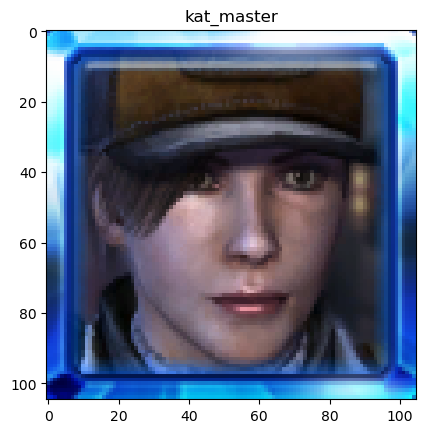

0.4177985191345215

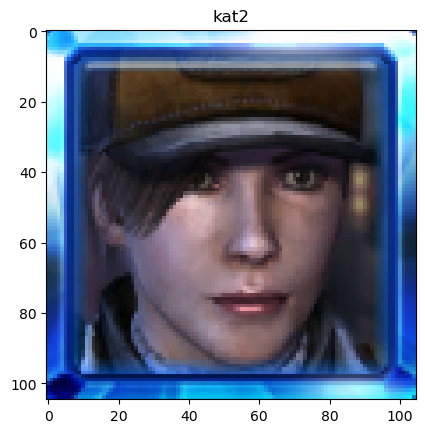

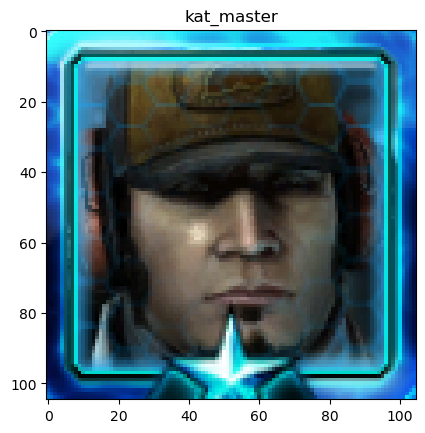

0.25887566804885864

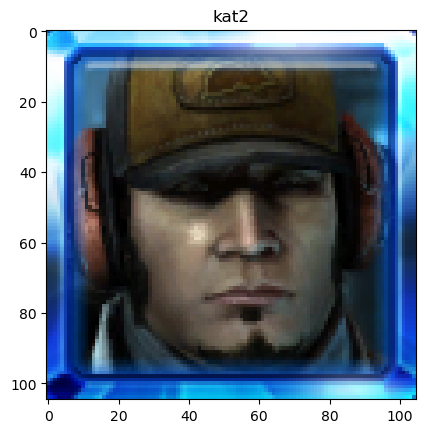

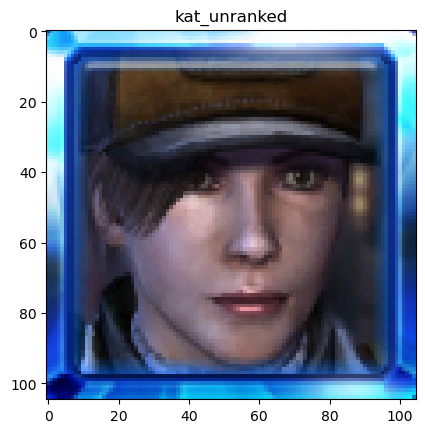

0.41873782873153687

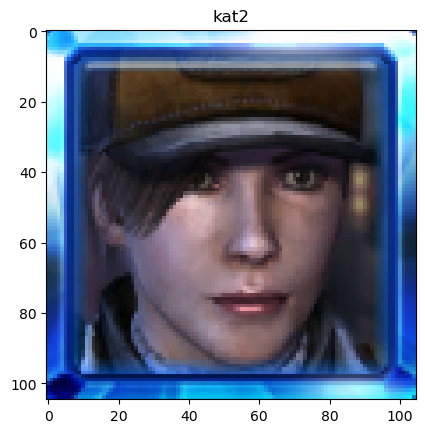

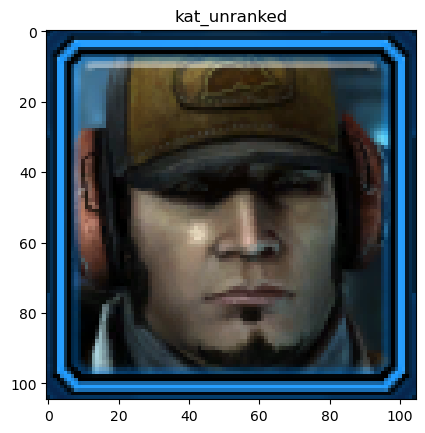

0.28585419058799744

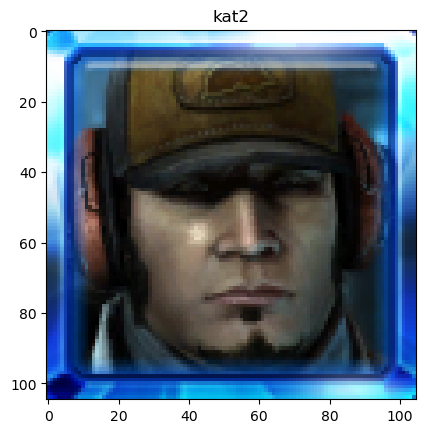

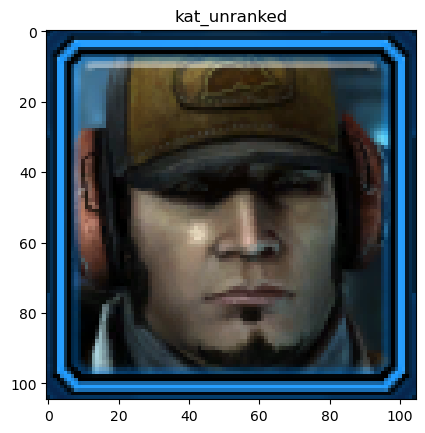

0.8557567596435547

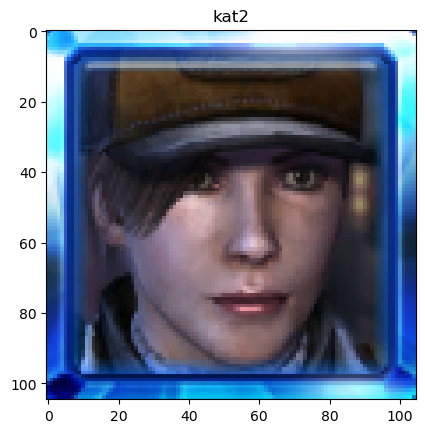

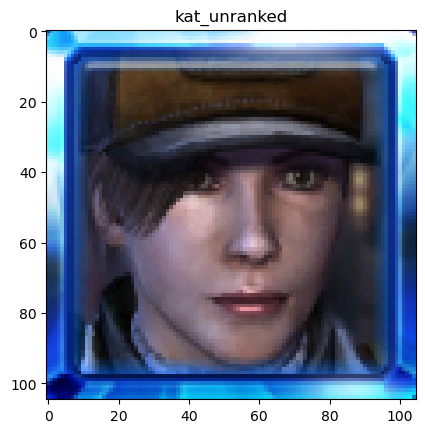

0.9980946779251099

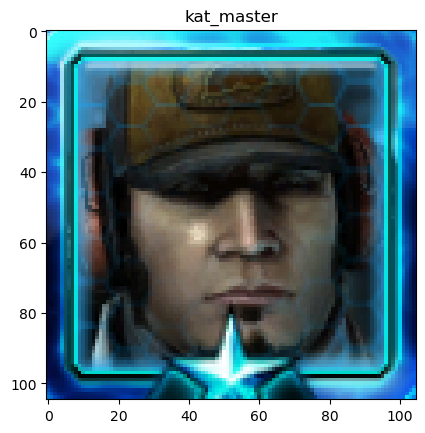

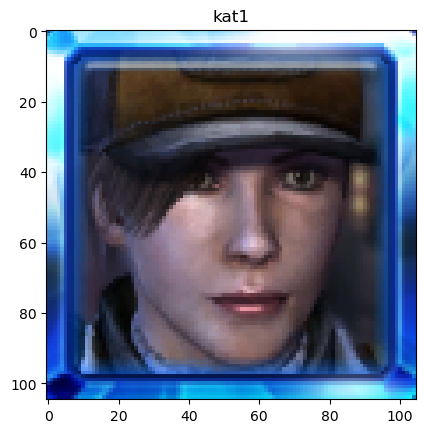

0.25978270173072815

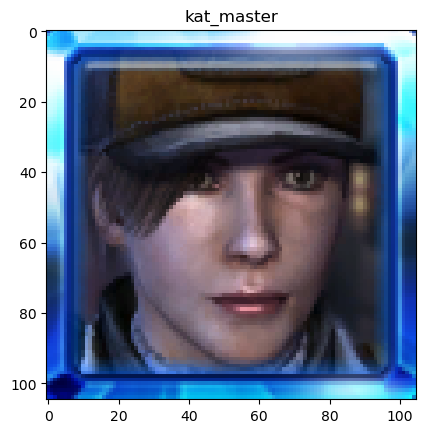

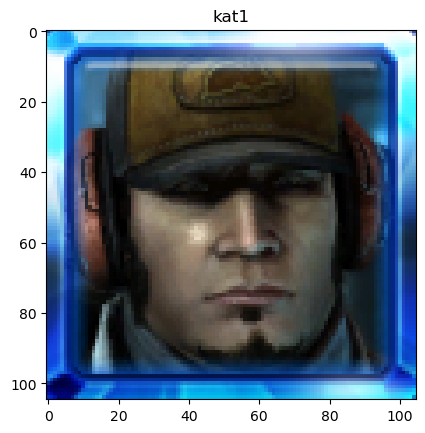

0.4188699722290039

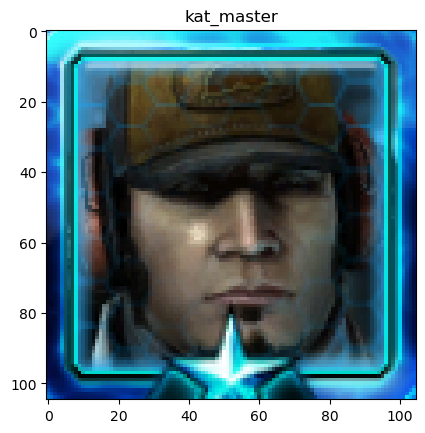

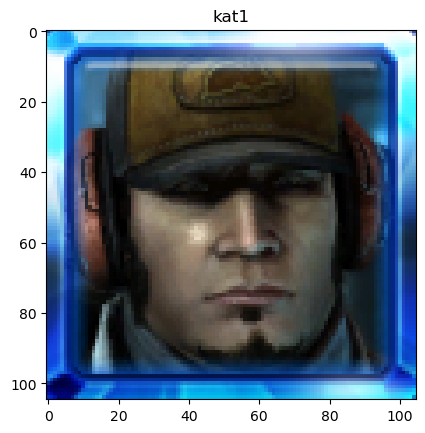

0.7304013967514038

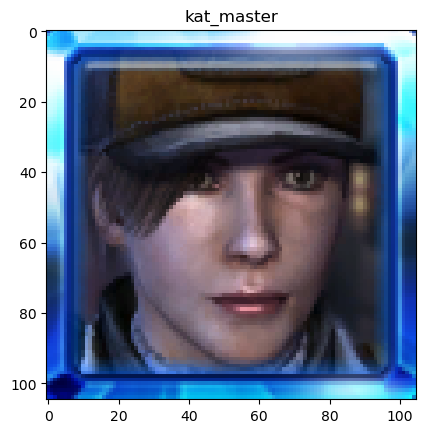

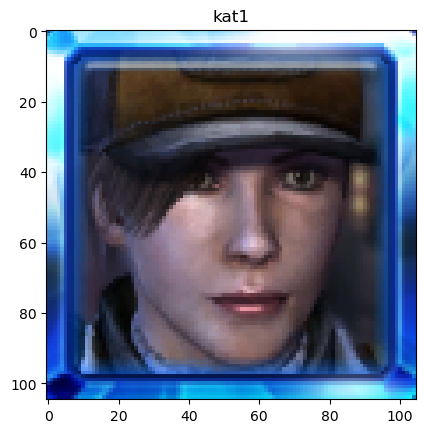

0.9984263181686401

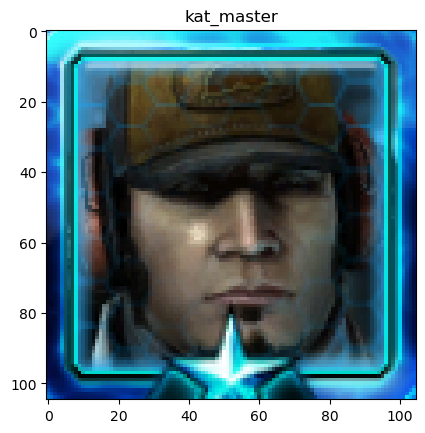

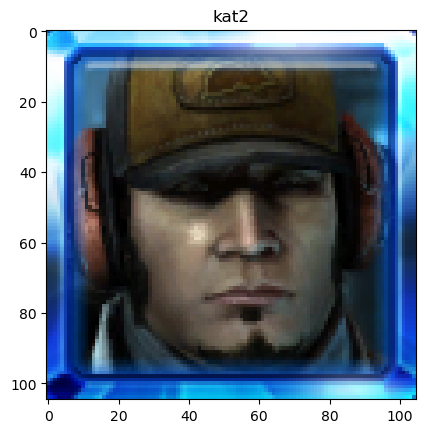

0.7320858836174011

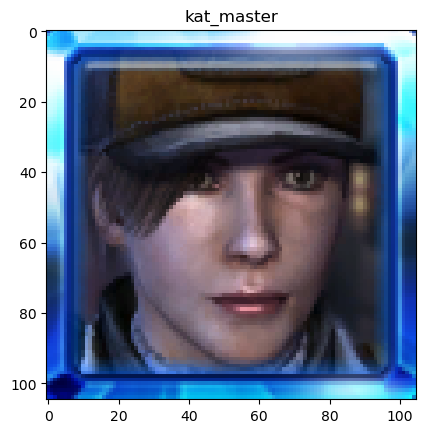

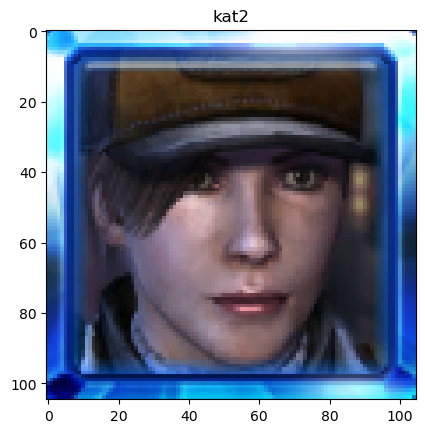

0.9999366998672485

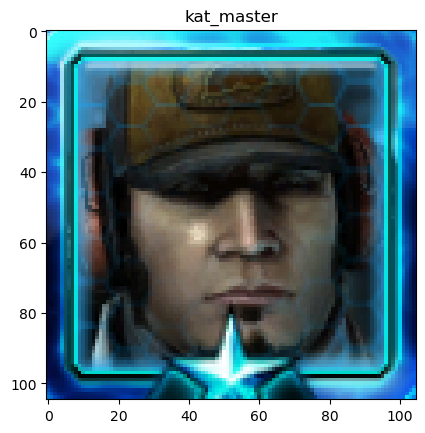

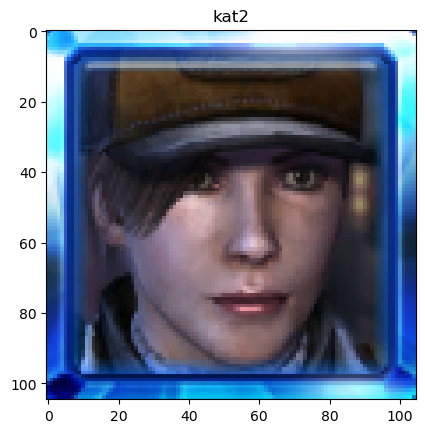

0.25887566804885864

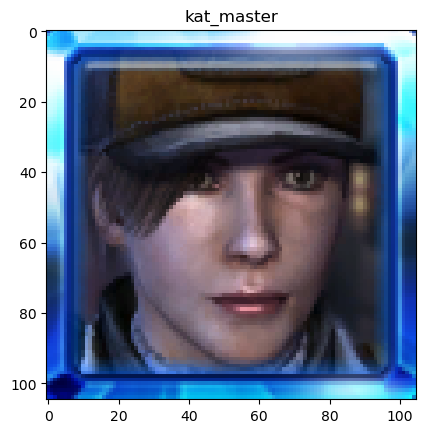

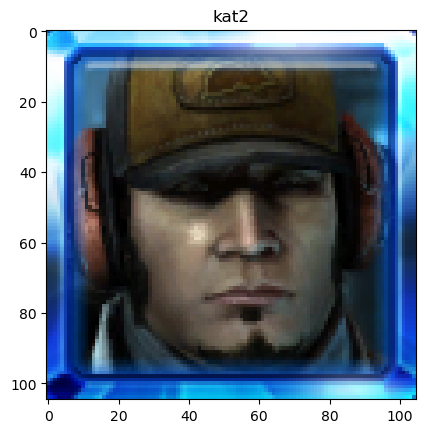

0.4177985191345215

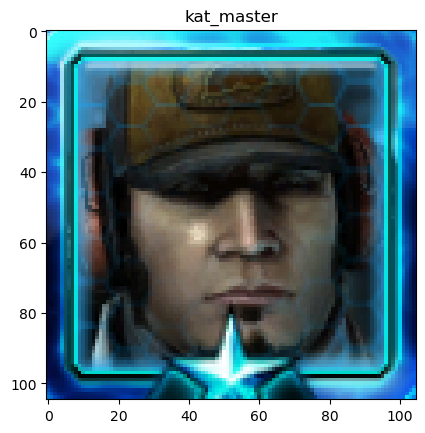

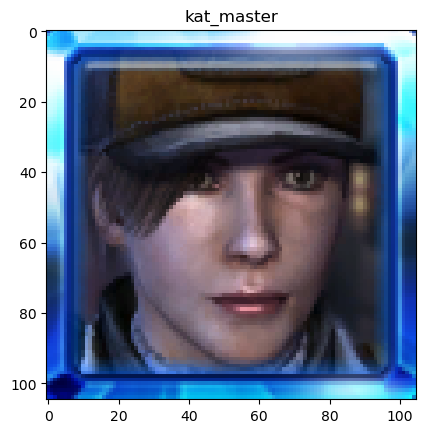

0.25885680317878723

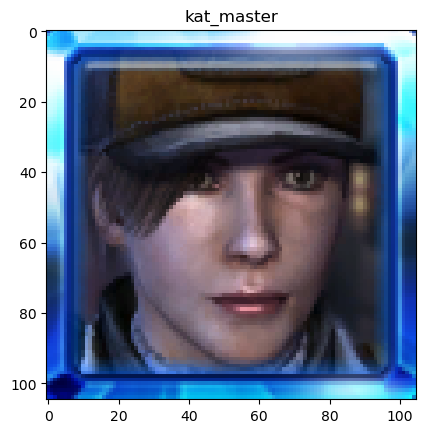

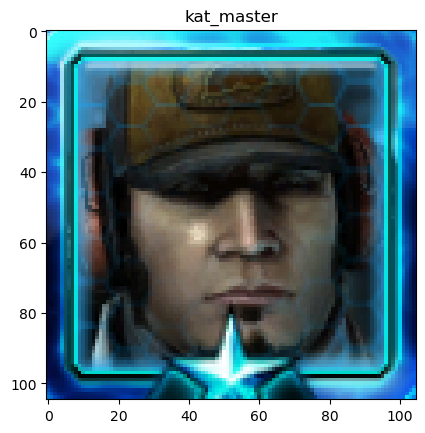

0.25885680317878723

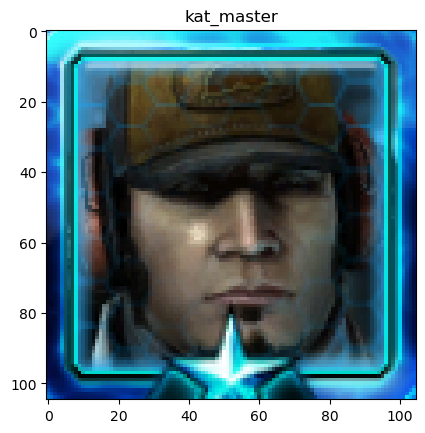

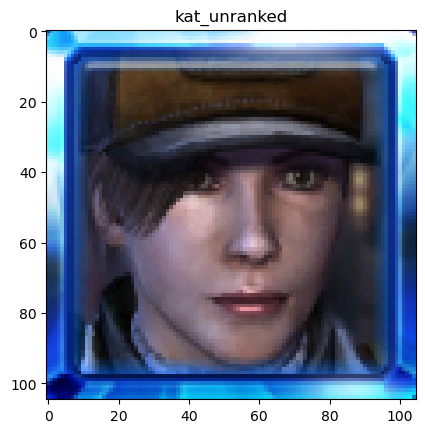

0.2595400810241699

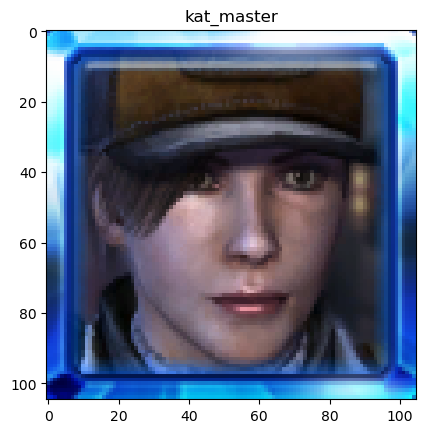

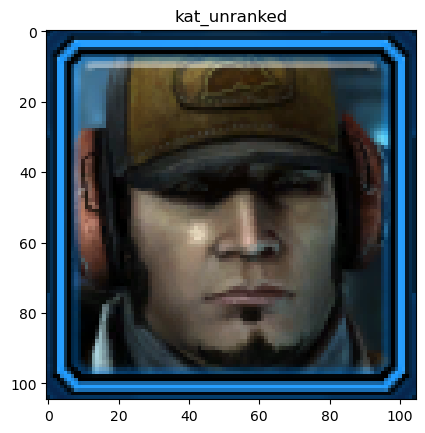

0.2854481041431427

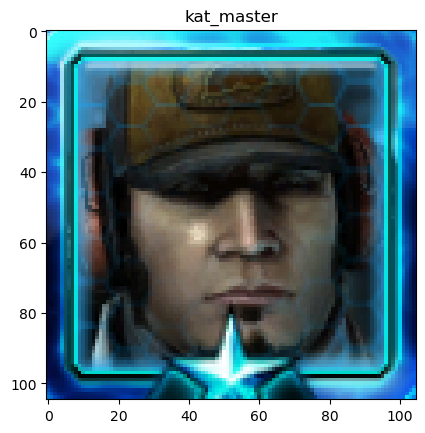

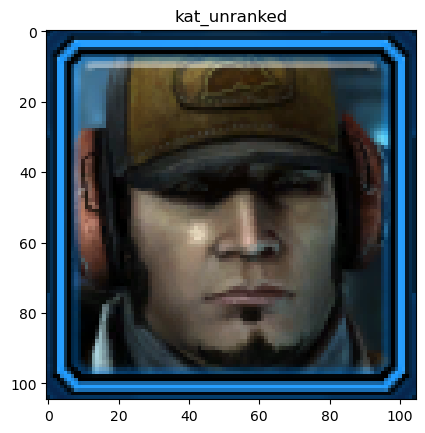

0.7184597253799438

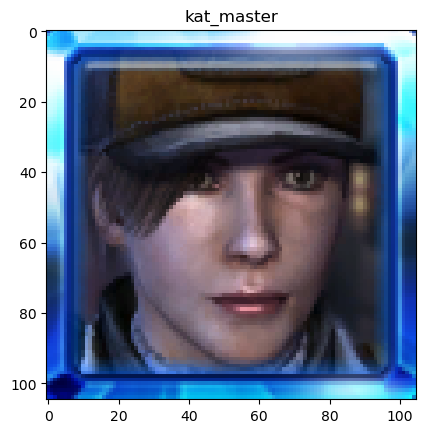

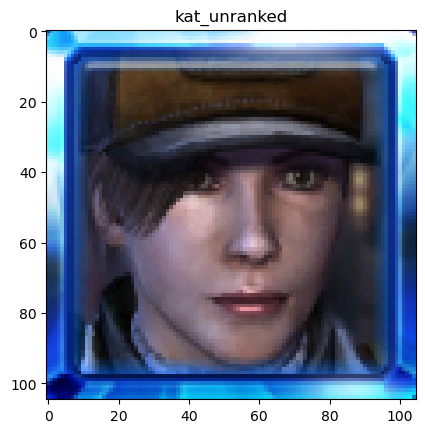

0.9983494877815247

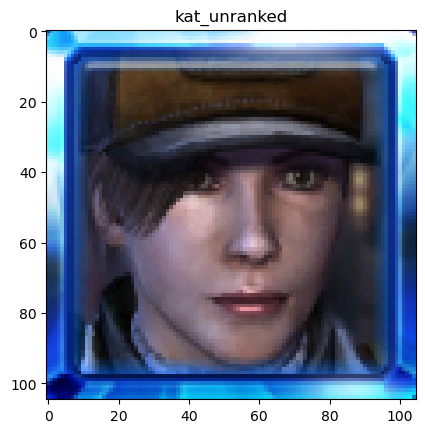

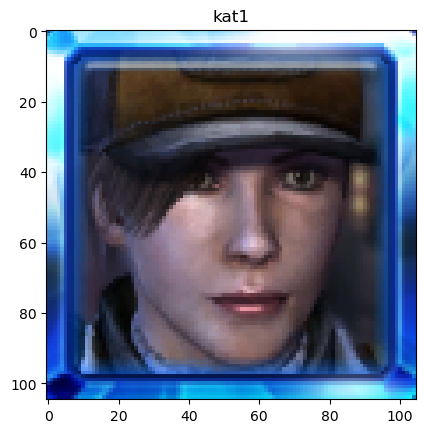

0.9997924566268921

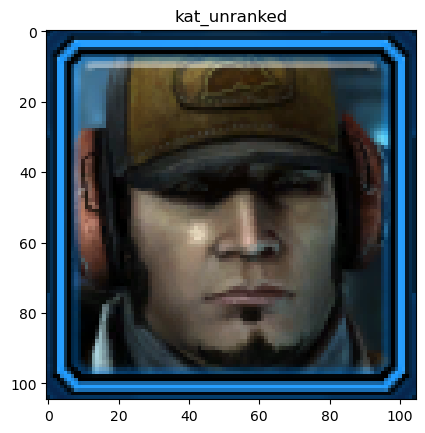

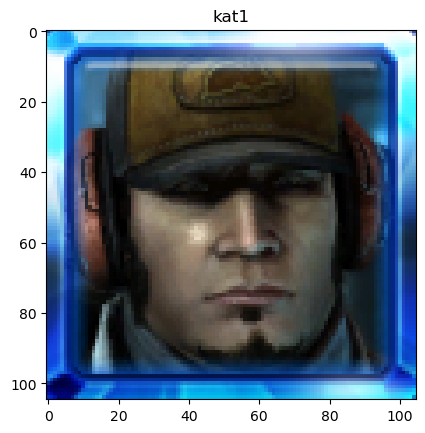

0.8554396033287048

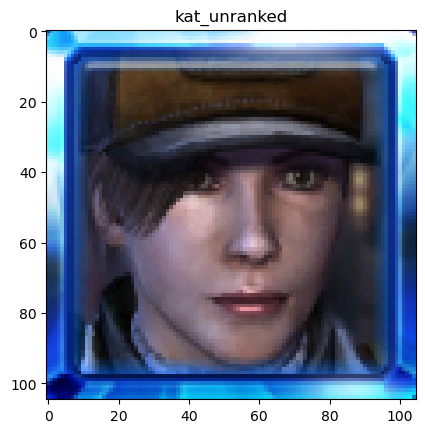

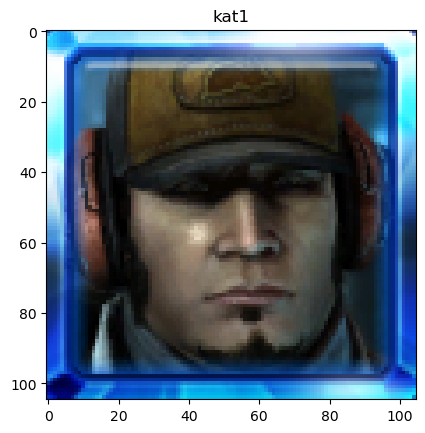

0.41799232363700867

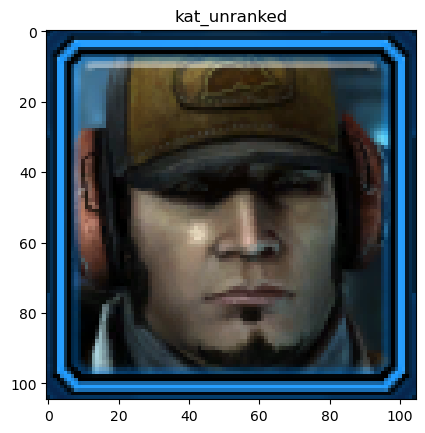

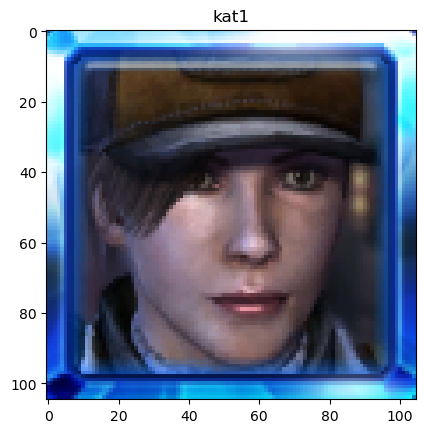

0.2850280702114105

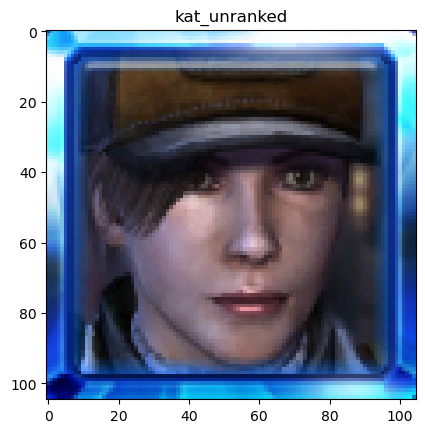

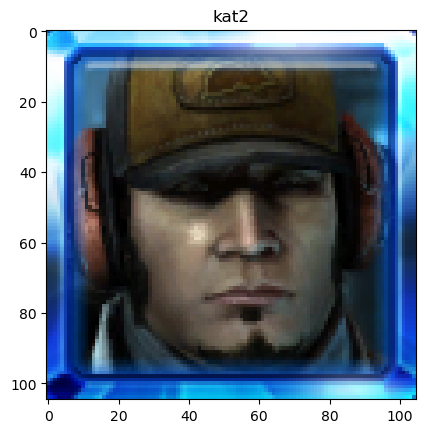

0.41873782873153687

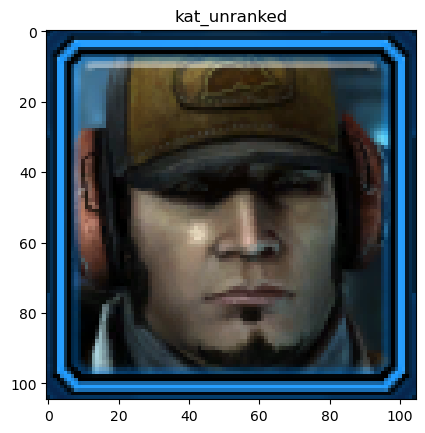

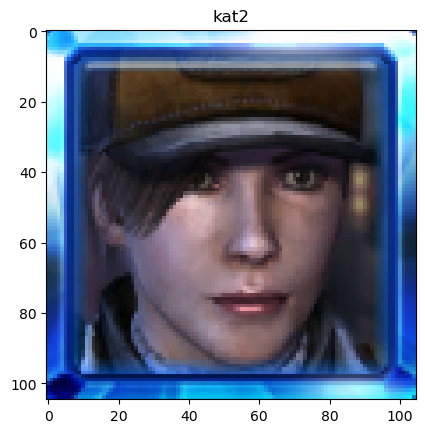

0.28585419058799744

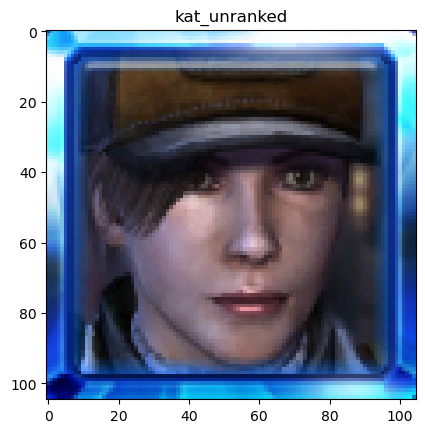

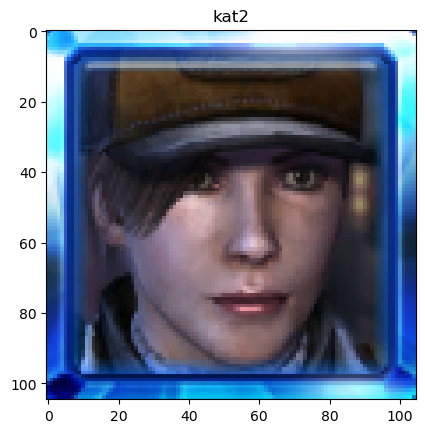

0.9980946779251099

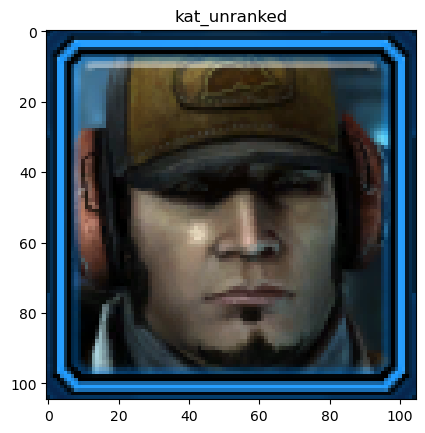

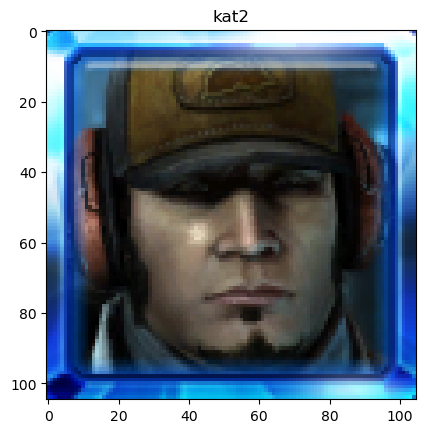

0.8557567596435547

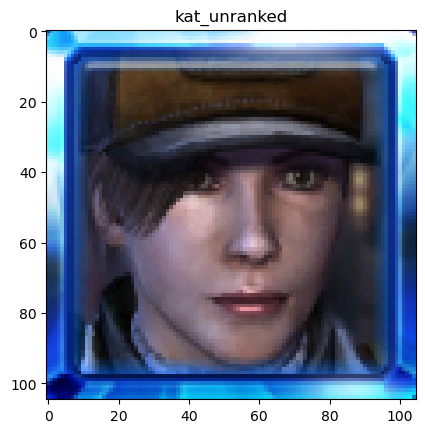

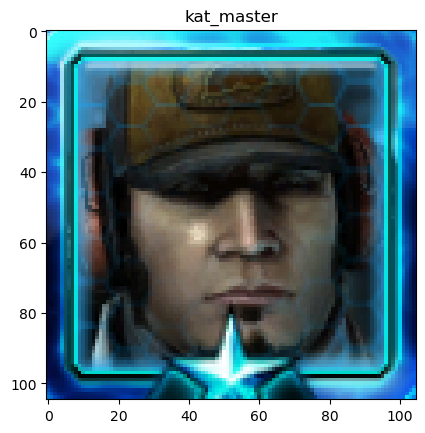

0.2595400810241699

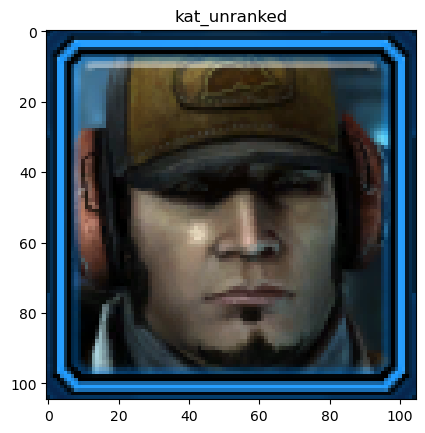

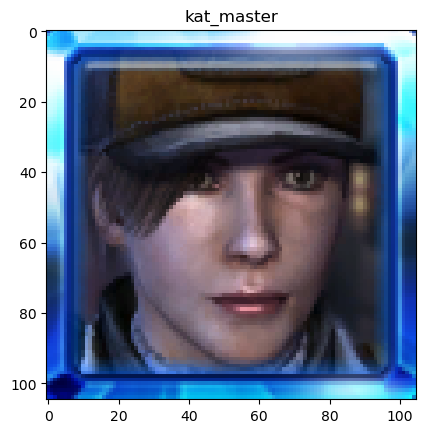

0.2854481041431427

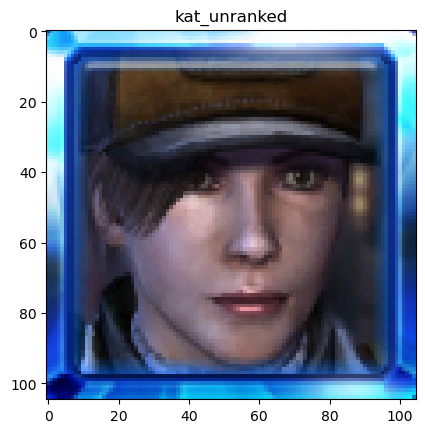

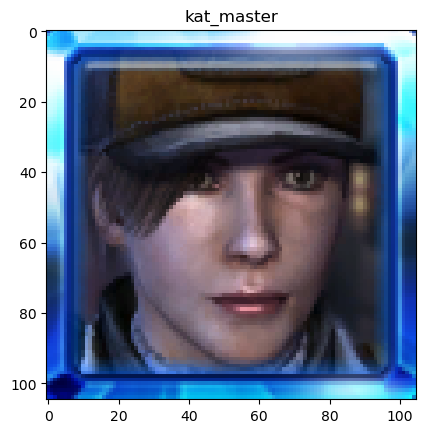

0.9983494877815247

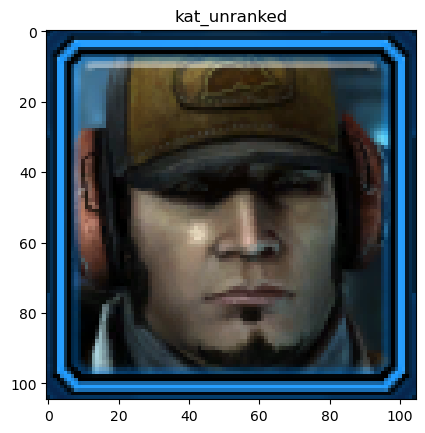

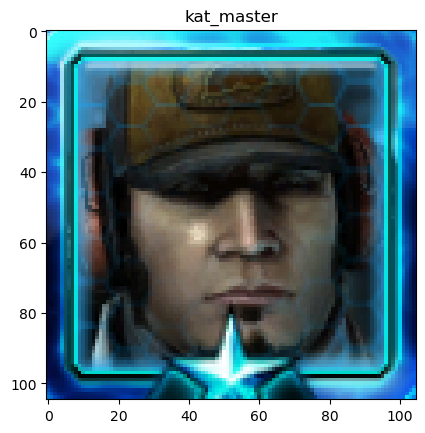

0.7184597253799438

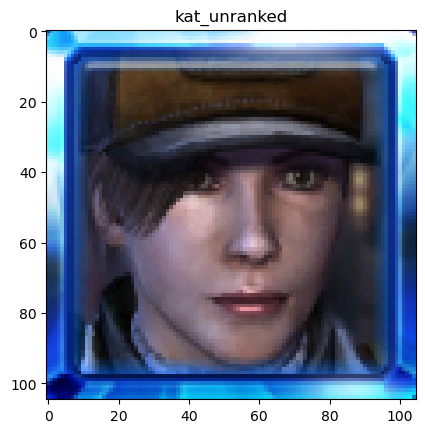

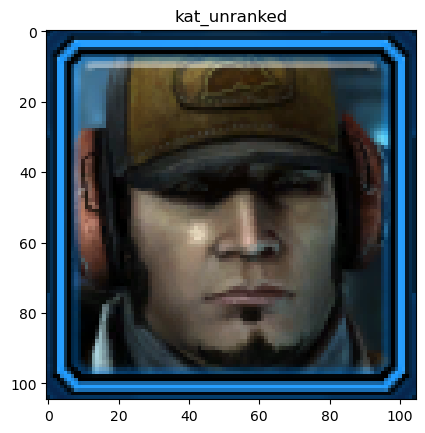

0.2851560115814209

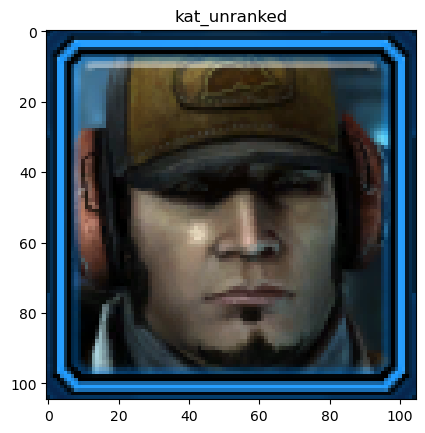

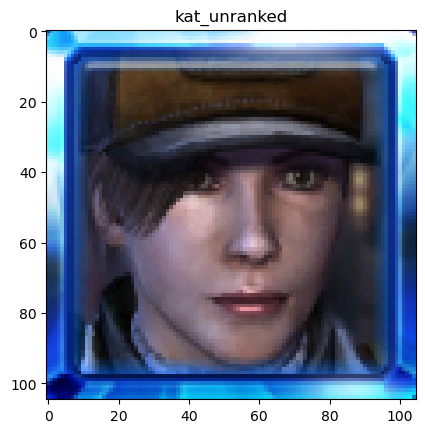

0.2851560115814209

In [264]:
# compare left and right regions of screenshots

def show_comparison(kat1, img1, kat2, img2, metric: Callable=ssim_external, threshold=0.95, noshow=False):
    
    
    if metric(img1, zatic) > threshold or metric(img2, zatic) > threshold:
        return
    error = metric(img1, img2)
    if int(error) == 1:
        return
        pass
    
    if noshow:
        display(kat1, kat2, error)
    else:
        plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
        plt.title(kat1)
        plt.show()
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
        plt.title(kat2)
        plt.show()
        display(error)


for kat, (left, right) in imgs.items():
    for kat2, (left2, right2) in imgs.items():
        show_comparison(kat, left, kat2, left2)
        show_comparison(kat, right, kat2, right2)
        show_comparison(kat, left, kat2, right2)
        show_comparison(kat, right, kat2, left2)
